In [1]:
from Functions import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
dfer=pd.read_excel('../data/momentum_data.xlsx','factors (excess returns)')
dfm=pd.read_excel('../data/momentum_data.xlsx','momentum (excess returns)')
dfd=pd.read_excel('../data/momentum_data.xlsx','deciles (total returns)')
dfs=pd.read_excel('../data/momentum_data.xlsx','size_sorts (total returns)')


In [46]:
subsamples=[(1927,2023),(1927,1993),(1994,2008),(2009,2023)]
res=pd.DataFrame()
for i in subsamples:
    tstats=calculate_statistics_array(dfm[(dfm['Date']>=str(i[0])) & (dfm['Date']<=str(i[1]+1))]['UMD'])
    res.loc[str(i),'mean']=tstats['mean']
    res.loc[str(i),'vol']=tstats['volatility']
    res.loc[str(i),'Sharpe']=tstats['sharpe']
    res.loc[str(i),'skewness']=tstats['skewness']
    tumd=np.array(dfm[(dfm['Date']>=str(i[0])) & (dfm['Date']<=str(i[1]+1))]['UMD'])
    tmkt=np.array(dfer[(dfer['Date']>=str(i[0])) & (dfer['Date']<=str(i[1]+1))]['MKT'])
    res.loc[str(i),'corr to rm']=np.corrcoef(tumd,tmkt)[0,1]
res

,mean,vol,Sharpe,skewness,corr to rm
"(1927, 2023)",0.074791,0.162999,0.458845,-2.988203,-0.346337
"(1927, 1993)",0.090113,0.159891,0.563593,-3.801867,-0.362537
"(1994, 2008)",0.104373,0.175062,0.596206,-0.577177,-0.234519
"(2009, 2023)",-0.026030,0.161161,-0.161514,-2.675103,-0.385511


In [56]:
res=pd.DataFrame()
lns=pd.DataFrame()
ln=pd.DataFrame()
lns['Date']=dfm['Date']
ln['Date']=dfm['Date']
lns['val']=((1/2)*(dfs['BIG HiPRIOR']+dfs['SMALL HiPRIOR']))-((1/2)*(dfs['BIG LoPRIOR']+dfs['SMALL LoPRIOR']))
ln['val']=(1/2)*(dfs['BIG HiPRIOR']+dfs['SMALL HiPRIOR'])
tstats=calculate_statistics_array(lns[lns['Date']>='1994']['val'])
res.loc['Long and Short','mean']=tstats['mean']
res.loc['Long and Short','vol']=tstats['volatility']
res.loc['Long and Short','Sharpe']=tstats['sharpe']
res.loc['Long and Short','skewness']=tstats['skewness']
tumdlns=np.array(lns[lns['Date']>='1994']['val'])
tmkt=np.array(dfer[dfer['Date']>='1994']['MKT'])
res.loc['Long and Short','corr to rm']=np.corrcoef(tumdlns,tmkt)[0,1]
tstats=calculate_statistics_array(ln[ln['Date']>='1994']['val'])
res.loc['Long Only','mean']=tstats['mean']
res.loc['Long Only','vol']=tstats['volatility']
res.loc['Long Only','Sharpe']=tstats['sharpe']
res.loc['Long Only','skewness']=tstats['skewness']
tumdln=np.array(ln[ln['Date']>='1994']['val'])
res.loc['Long Only','corr to rm']=np.corrcoef(tumdln,tmkt)[0,1]
res

,mean,vol,Sharpe,skewness,corr to rm
Long and Short,0.040078,0.16940,0.236590,-1.431421,-0.313551
Long Only,0.137652,0.17809,0.772933,-0.456268,0.900468


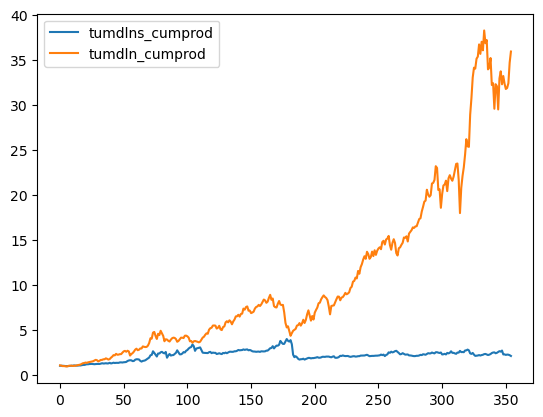

In [58]:
tumdlns_cumprod = np.cumprod(1 + tumdlns)
tumdln_cumprod = np.cumprod(1 + tumdln)

plt.plot(tumdlns_cumprod, label='tumdlns_cumprod')
plt.plot(tumdln_cumprod, label='tumdln_cumprod')
plt.legend()
plt.show()

In [69]:
momd1=dfd[(dfd['Date']>='1994')]['Hi PRIOR']-dfd[(dfd['Date']>='1994')]['Lo PRIOR']
momd3l = dfd[(dfd['Date']>='1994')][['Hi PRIOR', 'PRIOR 9', 'PRIOR 8']].sum(axis=1)
momd3s = dfd[(dfd['Date']>='1994')][['Lo PRIOR', 'PRIOR 2', 'PRIOR 3']].sum(axis=1)
mom3=(momd3l-momd3s)/3
momd5l = dfd[(dfd['Date']>='1994')][dfd.columns[-5:]].sum(axis=1)
momd5s = dfd[(dfd['Date']>='1994')][dfd.columns[1:6]].sum(axis=1)
momd5=(momd3l-momd3s)/5

In [70]:
res=pd.DataFrame()
tstats=calculate_statistics_array(momd1)
res.loc['momd1','mean']=tstats['mean']
res.loc['momd1','vol']=tstats['volatility']
res.loc['momd1','Sharpe']=tstats['sharpe']
res.loc['momd1','skewness']=tstats['skewness']
tmkt=np.array(dfer[dfer['Date']>='1994']['MKT'])
res.loc['momd1','corr to rm']=np.corrcoef(momd1,tmkt)[0,1]

tstats=calculate_statistics_array(mom3)
res.loc['mom3','mean']=tstats['mean']
res.loc['mom3','vol']=tstats['volatility']
res.loc['mom3','Sharpe']=tstats['sharpe']
res.loc['mom3','skewness']=tstats['skewness']
res.loc['mom3','corr to rm']=np.corrcoef(mom3,tmkt)[0,1]

tstats=calculate_statistics_array(momd5)
res.loc['momd5l','mean']=tstats['mean']
res.loc['momd5l','vol']=tstats['volatility']
res.loc['momd5l','Sharpe']=tstats['sharpe']
res.loc['momd5l','skewness']=tstats['skewness']
res.loc['momd5l','corr to rm']=np.corrcoef(momd5,tmkt)[0,1]

res


,mean,vol,Sharpe,skewness,corr to rm
momd1,0.074873,0.298162,0.251116,-1.301710,-0.329943
mom3,0.024814,0.193925,0.127954,-1.344815,-0.370049
momd5l,0.014888,0.116355,0.127954,-1.344815,-0.370049


In [72]:
moms=dfs[(dfs['Date']>='1994')]['SMALL HiPRIOR']-dfs[(dfs['Date']>='1994')]['SMALL LoPRIOR']
momb=dfs[(dfs['Date']>='1994')]['BIG HiPRIOR']-dfs[(dfs['Date']>='1994')]['BIG LoPRIOR']

res=pd.DataFrame()

tstats=calculate_statistics_array(lns[lns['Date']>='1994']['val'])
res.loc['Long and Short','mean']=tstats['mean']
res.loc['Long and Short','vol']=tstats['volatility']
res.loc['Long and Short','Sharpe']=tstats['sharpe']
res.loc['Long and Short','skewness']=tstats['skewness']
tumdlns=np.array(lns[lns['Date']>='1994']['val'])
tmkt=np.array(dfer[dfer['Date']>='1994']['MKT'])
res.loc['Long and Short','corr to rm']=np.corrcoef(tumdlns,tmkt)[0,1]

tstats=calculate_statistics_array(moms)
res.loc['moms','mean']=tstats['mean']
res.loc['moms','vol']=tstats['volatility']
res.loc['moms','Sharpe']=tstats['sharpe']
res.loc['moms','skewness']=tstats['skewness']
tmkt=np.array(dfer[dfer['Date']>='1994']['MKT'])
res.loc['moms','corr to rm']=np.corrcoef(moms,tmkt)[0,1]

tstats=calculate_statistics_array(momb)
res.loc['momb','mean']=tstats['mean']
res.loc['momb','vol']=tstats['volatility']
res.loc['momb','Sharpe']=tstats['sharpe']
res.loc['momb','skewness']=tstats['skewness']
res.loc['momb','corr to rm']=np.corrcoef(momb,tmkt)[0,1]

res


,mean,vol,Sharpe,skewness,corr to rm
Long and Short,0.040078,0.169400,0.236590,-1.431421,-0.313551
moms,0.059358,0.171681,0.345744,-1.736630,-0.309153
momb,0.020799,0.183667,0.113242,-0.873411,-0.289410
